# Performance Evaluation between pre-processed and self-processed data

The performance of the models on both data neew to be tested, to ensure that the sel-processed data is able to reproduce the original results and serve as baseline.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
import tensorflow as tf
import tensorflow_addons as tfa
from os.path import join as osj
import pandas as pd
import seaborn as sns
import random
import pickle
import os

## Load results

In [3]:
def load_original_performances():

    with open(osj(f"../results/intrapatient/results_o.pkl"), 'rb') as f:
        intra_results = pickle.load(f)

    with open(osj(f"../results/interpatient/results_o.pkl"), 'rb') as f:
        inter_results = pickle.load(f)

    return intra_results, inter_results

def load_self_performances():

    with open(osj(f"../results/intrapatient/results_self.pkl"), 'rb') as f:
        intra_results = pickle.load(f)

    with open(osj(f"../results/interpatient/results_self.pkl"), 'rb') as f:
        inter_results = pickle.load(f)
    

    return intra_results, inter_results

In [4]:
intra_results, inter_results = load_original_performances()
self_intra_results, self_inter_results = load_self_performances()

## Transform results

In [ ]:
records = []

# Extract results
for epoch, metrics in intra_results.items():
    for metric, values in metrics.items():
        if isinstance(values, np.ndarray) and len(values) == 3:
            records.append({"Model": "Intra", "Epoch": epoch, "Metric": metric, "F": None,      "N": values[0], "S": values[1], "V": values[2]})
        elif isinstance(values, np.ndarray) and len(values) == 4:
            records.append({"Model": "Intra", "Epoch": epoch, "Metric": metric, "F": values[0], "N": values[1], "S": values[2], "V": values[3]})

for epoch, metrics in inter_results.items():
    for metric, values in metrics.items():
        if isinstance(values, np.ndarray) and len(values) == 3:
            records.append({"Model": "Inter", "Epoch": epoch, "Metric": metric, "F": None,      "N": values[0], "S": values[1], "V": values[2]})
        elif isinstance(values, np.ndarray) and len(values) == 4:
            records.append({"Model": "Inter", "Epoch": epoch, "Metric": metric, "F": values[0], "N": values[1], "S": values[2], "V": values[3]})

for epoch, metrics in self_intra_results.items():
    for metric, values in metrics.items():
        if isinstance(values, np.ndarray) and len(values) == 3:
            records.append({"Model": "Intra self", "Epoch": epoch, "Metric": metric, "F": None,      "N": values[0], "S": values[1], "V": values[2]})
        elif isinstance(values, np.ndarray) and len(values) == 4:
            records.append({"Model": "Intra self", "Epoch": epoch, "Metric": metric, "F": values[0], "N": values[1], "S": values[2], "V": values[3]})

for epoch, metrics in self_inter_results.items():
    for metric, values in metrics.items():
        if isinstance(values, np.ndarray) and len(values) == 3:
            records.append({"Model": "Inter self", "Epoch": epoch, "Metric": metric, "F": None,      "N": values[0], "S": values[1], "V": values[2]})
        elif isinstance(values, np.ndarray) and len(values) == 4:
            records.append({"Model": "Inter self", "Epoch": epoch, "Metric": metric, "F": values[0], "N": values[1], "S": values[2], "V": values[3]})

df_results = pd.DataFrame(records)

In [5]:
df_results

,Model,Epoch,Metric,F,N,S,V
0,Intra,9,acc,0.999010,0.998020,0.999505,0.999505
1,Intra,9,sens,0.866667,1.000000,0.978261,0.993104
2,Intra,9,spec,1.000000,0.980582,1.000000,1.000000
3,Intra,9,prec,1.000000,0.997800,1.000000,1.000000
4,Intra,9,neg_pred_value,0.999004,1.000000,0.999494,0.999467
...,...,...,...,...,...,...,...
355,Inter self,99,neg_pred_value,NaN,0.885640,0.994513,1.000000
356,Inter self,99,false_pos_rate,NaN,0.050773,0.012689,0.000413
357,Inter self,99,false_neg_rate,NaN,0.013995,0.140523,0.000000
358,Inter self,99,false_det_rate,NaN,0.005845,0.275815,0.005892


## Plot performance

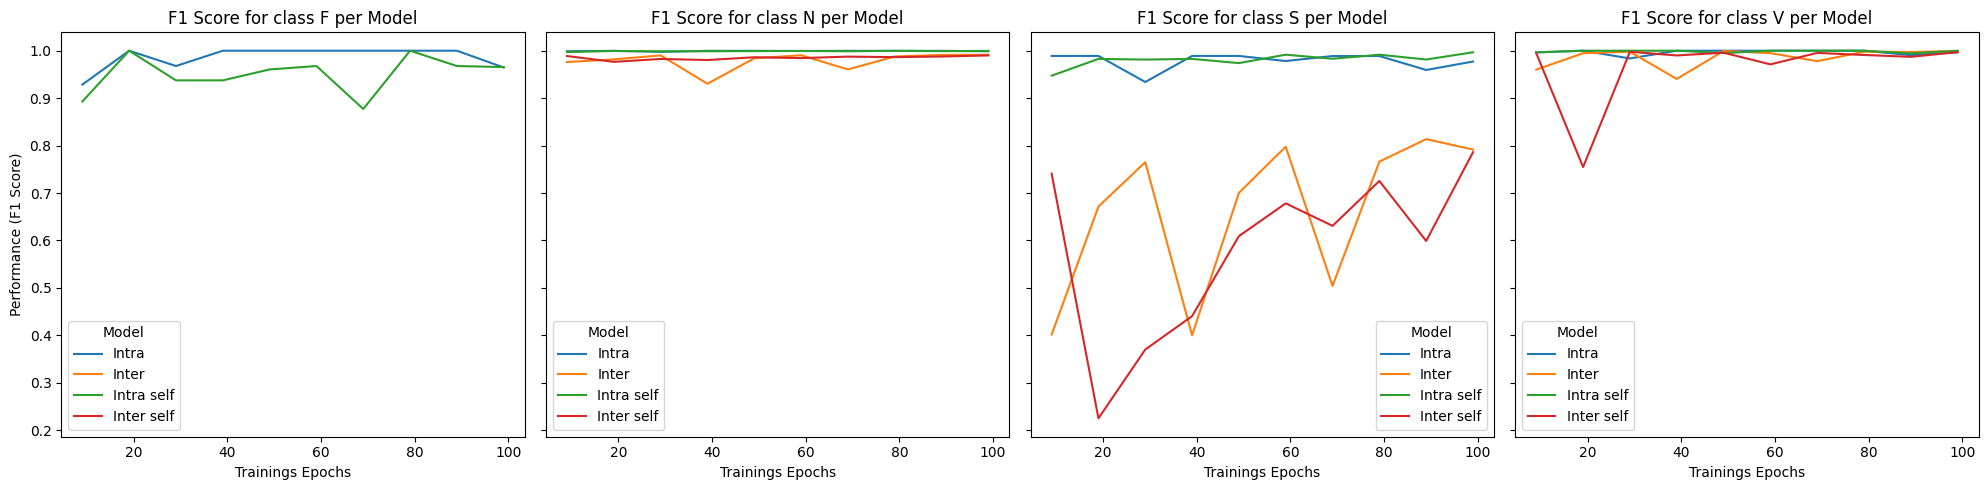

In [ ]:
f1_results = df_results[(df_results["Metric"] == "f1_score")]
classes = ["F", "N", "S", "V"]

fig, axes = plt.subplots(1, len(classes), figsize=(20, 5), sharey=True)

for i, cls in enumerate(classes):
    sns.lineplot(
        data=f1_results,
        x="Epoch",
        y=cls, 
        hue="Model",
        ax=axes[i]
    )
    axes[i].set_title(f"F1 Score for class {cls} per Model")
    axes[i].set_xlabel("Trainings Epochs")

axes[0].set_ylabel("Performance (F1 Score)")
axes[-1].legend(title="Model")

plt.tight_layout()
plt.show()

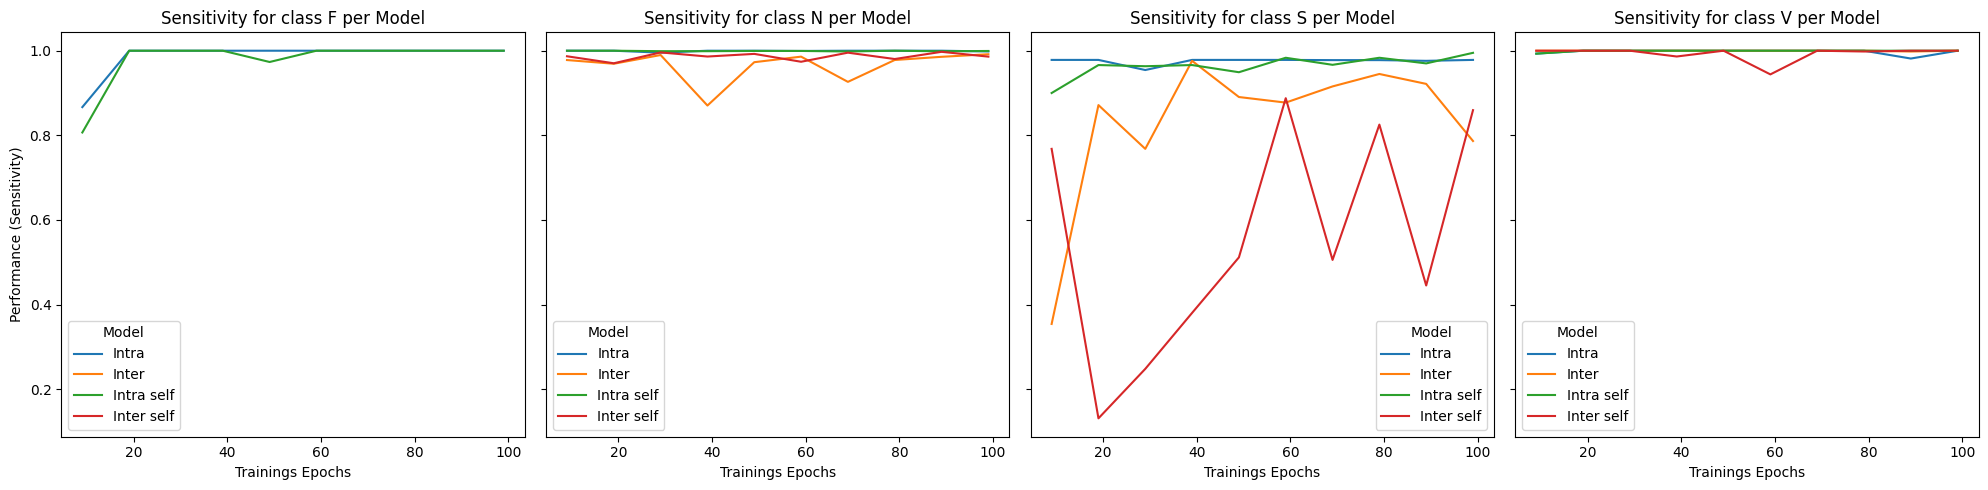

In [ ]:
f1_results = df_results[(df_results["Metric"] == "sens")]
classes = ["F", "N", "S", "V"]

fig, axes = plt.subplots(1, len(classes), figsize=(20, 5), sharey=True)

for i, cls in enumerate(classes):
    sns.lineplot(
        data=f1_results,
        x="Epoch",
        y=cls, 
        hue="Model",
        ax=axes[i]  
    )
    axes[i].set_title(f"Sensitivity for class {cls} per Model")
    axes[i].set_xlabel("Trainings Epochs")

axes[0].set_ylabel("Performance (Sensitivity)")
axes[-1].legend(title="Model")

plt.tight_layout()
plt.show()

In [2]:
def read_dp_signals():
    with open(osj("..", "data_dp", "gaussian_a" + ".pkl"), "rb") as f:
        return pickle.load(f)

def save_dp_signals(data, epsilon):
    with open(osj("..", "data_dp", f"gaussian_a_{epsilon}.pkl"), "wb") as f:
        pickle.dump(data, f)

##  Plot loss 

In [2]:
def load_original_loss():

    with open(osj(f"../results/intrapatient/loss_o.pkl"), 'rb') as f:
        intra_loss = pickle.load(f)

    with open(osj(f"../results/interpatient/loss_o.pkl"), 'rb') as f:
        inter_loss = pickle.load(f)

    return intra_loss, inter_loss

def load_self_loss():

    with open(osj(f"../results/intrapatient/loss_self.pkl"), 'rb') as f:
        intra_loss = pickle.load(f)

    with open(osj(f"../results/interpatient/loss_self.pkl"), 'rb') as f:
        inter_loss = pickle.load(f)
    

    return intra_loss, inter_loss

In [3]:
intra_loss, inter_loss = load_original_loss()
self_intra_loss, self_inter_loss = load_self_loss()

# Validate if train test data differs over mutliple runs

Result: Yes the train test split differs over multiple runs and hence can not be reproduced.
The train test data split needs to be stored for training the shadow model for membership inference attack.

In [2]:
def load_traintest_data():
    with open(osj(f"../data_shadow/laplace_traintestdata.pkl"), 'rb') as f:
        return pickle.load(f)
    
def load_traintest_data_1():
    with open(osj(f"../data_shadow/laplace_traintestdata_1.pkl"), 'rb') as f:
        return pickle.load(f)

In [3]:
traintest_data = load_traintest_data()
traintest_data_1 = load_traintest_data_1()

In [14]:
traintest_data['X_train'][0][0]

array([1.7622131104503576, 0.41854424000394536, 1.0976138317835038,
       -2.5670779546133926, 25.90180730069274, -11.515098764879927,
       -13.269766119498092, -3.61938468756117, -6.629699758758359,
       -0.04667202633903689, -13.370124213195341, -3.4275916507092283,
       3.536590415063494, 0.7782927954477066, 6.592061525416838,
       0.27177709464329053, 4.141838808544406, 4.328436214479646,
       -4.978375866635025, 5.679989392231478, 0.3783100814587211,
       -5.310745129657582, -0.28029219391423627, 6.457653898806325,
       -1.79968110436686, 0.432764527620644, 5.3812222916939545,
       3.855514330350242, 11.66073542918402, -0.1720978113833208,
       -8.174189171502888, 1.8411793659705253, 0.580860906618602,
       -0.879618800624788, 3.9897003218340927, 4.4048687037563745,
       0.7040592761438659, -1.884205123640184, -9.214704114950607,
       -4.01915481953249, 6.25598942871644, -6.289139432805841,
       -1.3831466353191644, 4.408468480330639, -3.545697208796704,

In [11]:
traintest_data_1['X_train'][0]

array([[-6.080813722041355, 4.292372762297031, -6.559386735132442, ...,
        -4.007007398244175, -0.7874634954450728, 8.862481250823226],
       [-3.9207750935853705, -7.912639337857891, 8.388000053941184, ...,
        0.2879333893793259, -10.780471164657392, -4.79944672539904],
       [2.919965458896032, 3.4532861328245494, 2.6528650338082618, ...,
        -14.672721207258755, -1.6261995035043548, -3.4319480996547815],
       ...,
       [-2.648553905052361, 1.323518057272649, 12.963590572670574, ...,
        4.25153210366809, -2.023140410263258, 3.1443750264955987],
       [-3.168823753576766, -10.815946063932671, -0.15337481972640044,
        ..., -1.692619656217472, 2.7207700326436344, 0.4140216909524496],
       [4.075599896897815, -1.428450418393721, 2.4092082070545926, ...,
        0.09249035701471331, 0.10470549041671662, 6.962870732549666]],
      dtype=object)